# DANDI Archive - AI-Generated Notebook

**Dandiset ID:** 001341

**Description:** Barrel cortex electrophysiology during tactile VR whisker-guided navigation

**License:** CC-BY-4.0

**Keywords:** barrel cortex; S1; behavior; decision making; VR

**Number of Files:** 1

**Number of Subjects:** 1

**Warning:** This notebook was AI-generated with human supervision and has not been fully verified. Use caution when interpreting the code or results.

This notebook will guide you through exploring the Dandiset 001341, which contains electrophysiology data from the barrel cortex of mice during a tactile virtual reality whisker-guided navigation task.

**Please ensure you have the following packages installed:**
```bash
pip install pynwb lindi matplotlib seaborn dandi
```

In [1]:
import pynwb
import lindi
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
from dandi.dandiapi import DandiAPIClient

## List Dandiset Assets
First, let's use the DANDI API to list all of the assets in the Dandiset.

In [2]:
client = DandiAPIClient()
dandiset = client.get_dandiset("001341")
assets = list(dandiset.get_assets())
print(f"Number of assets: {len(assets)}")
for asset in assets:
    print(f"Asset path: {asset.path}")

Number of assets: 2
Asset path: sub-489/sub-489_ses-20220708.nwb
Asset path: sub-503/sub-503_ses-20220902.nwb


## Load NWB File
Now, let's load an NWB file from the Dandiset and explore its contents. We will use the file `sub-489/sub-489_ses-20220708.nwb`.

In [3]:
# Load the NWB file
f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001341/assets/5738ae8a-dd82-425b-8966-bbcfd35649a7/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

/opt/hostedtoolcache/Python/3.11.11/x64/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Explore the NWB File Structure
Let's explore some of the key metadata and data available in the NWB file.

In [4]:
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experiment description: {nwb.experiment_description}")
print(f"Institution: {nwb.institution}")
print(f"Lab: {nwb.lab}")

Session description: 489
Identifier: 489
Session start time: 2022-07-08 00:00:00-05:00
Experiment description: Barrel cortex electrophysiology during tactile VR whisker-guided navigation
Institution: University of Illinois
Lab: Vlasov BioLab


## Access and Visualize Sample Data
Now, let's access and visualize some sample data from the NWB file. We will start by plotting the trial start and stop times.

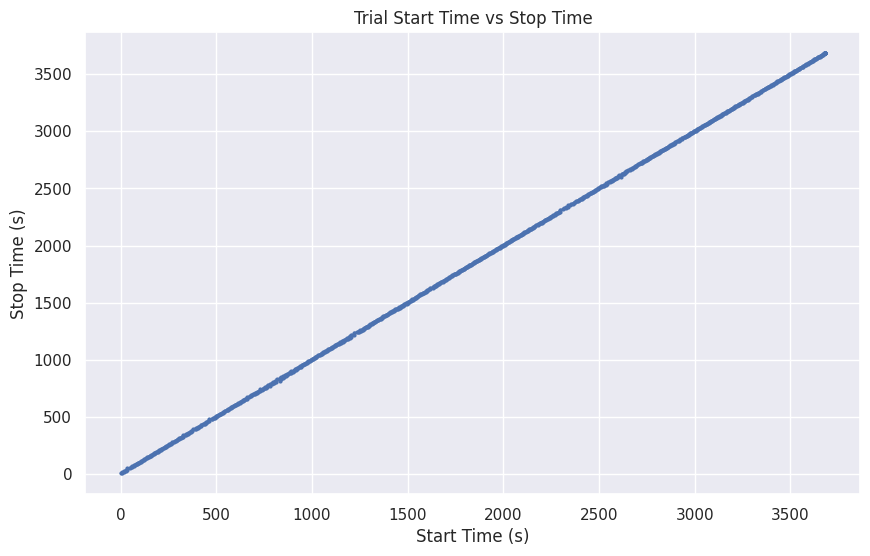

In [5]:
# Get the trials data
trials = nwb.intervals["trials"]
start_time = trials["start_time"].data[:]
stop_time = trials["stop_time"].data[:]

# Create a plot of start_time vs stop_time
plt.figure(figsize=(10, 6))
plt.plot(start_time, stop_time, marker='o', linestyle='-', markersize=2)
plt.xlabel("Start Time (s)")
plt.ylabel("Stop Time (s)")
plt.title("Trial Start Time vs Stop Time")
plt.grid(True)
plt.show()

The plot above shows the relationship between the start and stop times of the trials. The strong linear relationship indicates a consistent trial duration.

Next, we will explore the units data and plot the firing rate vs depth for different cortical layers.

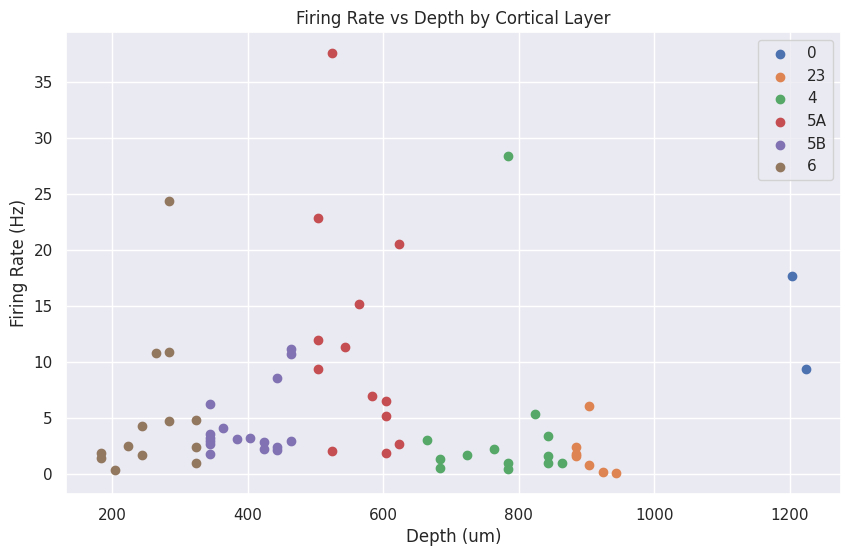

In [6]:
# Get the units data
units = nwb.units
firing_rate = units["firing_rate"].data[:]
depth = units["depth"].data[:]
layer = units["layer"].data[:]

# Create a scatter plot of firing_rate vs depth, colored by layer
plt.figure(figsize=(10, 6))
unique_layers = np.unique(layer)
for l in unique_layers:
    idx = layer == l
    plt.scatter(depth[idx], firing_rate[idx], label=l)

plt.xlabel("Depth (um)")
plt.ylabel("Firing Rate (Hz)")
plt.title("Firing Rate vs Depth by Cortical Layer")
plt.legend()
plt.grid(True)
plt.show()

The plot above shows the relationship between firing rate and depth for different cortical layers. This visualization can help identify variations in neuronal activity across different layers.

## Common Analyses Examples
Here are some examples of common analyses that might be relevant to this dataset's content:

1.  **Spike Train Analysis:** Analyze the spike trains of individual neurons to identify firing patterns and correlations with the whisker-guided navigation task.
2.  **Trial-Averaged Activity:** Average neuronal activity across trials to identify task-related responses.
3.  **Population Decoding:** Use population decoding techniques to predict the mouse's behavior based on the neuronal activity.